In [470]:
from sklearn import datasets,linear_model
import matplotlib.pyplot as plt
import numpy as np

In [471]:
data=datasets.load_iris()

#Can be used to slice specific features out of the data. Here, all 4 are used
x=data.data[:,:4]

#Attribute used as result that is kept seperately
y=data.target

total_no_samples=len(y)

print(total_no_samples)

150


In [472]:
random_indices=np.random.permutation(150)

#Taking the first 120 items for training
x_train=np.array(x)[random_indices[:120]]

y_train=np.array(y)[random_indices[:120]]

x_train_fitted=np.matrix(x_train.reshape(len(x_train),4))
y_train_fitted=np.matrix(y_train.reshape(len(y_train),1))

print(x_train_fitted)

[[6.4 3.1 5.5 1.8]
 [5.6 3.  4.5 1.5]
 [5.  2.  3.5 1. ]
 [5.3 3.7 1.5 0.2]
 [4.6 3.2 1.4 0.2]
 [5.8 2.7 4.1 1. ]
 [6.4 3.2 4.5 1.5]
 [6.8 3.2 5.9 2.3]
 [5.6 3.  4.1 1.3]
 [5.4 3.9 1.7 0.4]
 [6.  3.  4.8 1.8]
 [5.2 3.4 1.4 0.2]
 [5.5 2.6 4.4 1.2]
 [5.5 2.4 3.8 1.1]
 [6.5 3.  5.8 2.2]
 [4.9 3.6 1.4 0.1]
 [7.  3.2 4.7 1.4]
 [5.7 4.4 1.5 0.4]
 [6.2 2.8 4.8 1.8]
 [6.3 2.8 5.1 1.5]
 [5.8 4.  1.2 0.2]
 [4.9 2.5 4.5 1.7]
 [6.2 2.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [7.2 3.2 6.  1.8]
 [6.4 2.8 5.6 2.1]
 [4.4 3.2 1.3 0.2]
 [4.9 3.  1.4 0.2]
 [7.4 2.8 6.1 1.9]
 [4.8 3.4 1.9 0.2]
 [5.7 3.8 1.7 0.3]
 [4.9 3.1 1.5 0.1]
 [5.5 2.5 4.  1.3]
 [4.4 3.  1.3 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.6 1.4 0.2]
 [6.6 3.  4.4 1.4]
 [5.5 2.4 3.7 1. ]
 [6.3 2.5 5.  1.9]
 [4.6 3.4 1.4 0.3]
 [4.8 3.  1.4 0.3]
 [7.7 2.8 6.7 2. ]
 [5.1 3.5 1.4 0.2]
 [5.8 2.7 5.1 1.9]
 [5.7 2.5 5.  2. ]
 [5.1 3.8 1.5 0.3]
 [5.4 3.7 1.5 0.2]
 [6.3 2.9 5.6 1.8]
 [6.3 2.3 4.4 1.3]
 [6.9 3.1 5.4 2.1]
 [5.9 3.  5.1 1.8]
 [6.3 2.7 4.9 1.8]
 [5.8 2.7 3.

In [473]:
#Taking last 30 items for test
x_test=np.array(x)[random_indices[120:]]
y_test=np.array(y)[random_indices[120:]]

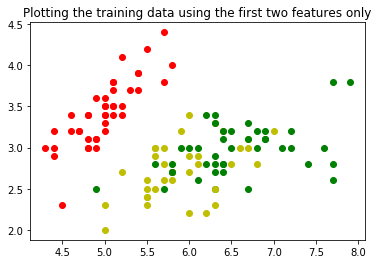

In [474]:
#Plotting each point in different colours according to the class it belongs to.
#For representation, using first 2 features to make a 2d graph
for i in range (0,len(x_train)):
    if(y_train[i]==0):
        plt.plot(x_train[i][0],x_train[i][1],"ro")
    elif(y_train[i]==1):
        plt.plot(x_train[i][0],x_train[i][1],"yo")
    else:
        plt.plot(x_train[i][0],x_train[i][1],"go")
plt.title("Plotting the training data using the first two features only")
plt.show()

In [475]:
model=linear_model.LogisticRegression(solver='liblinear',multi_class='auto')
model.fit(x_train_fitted,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [476]:
x_question=np.matrix(x_test.reshape(len(x_test),4))

print("Predicted classes for the test set:")
y_predicted=model.predict(x_question)
print(y_predicted)

Predicted classes for the test set:
[1 1 1 2 2 0 0 2 0 2 1 0 2 2 1 1 0 0 2 2 1 1 1 0 1 1 0 2 1 1]


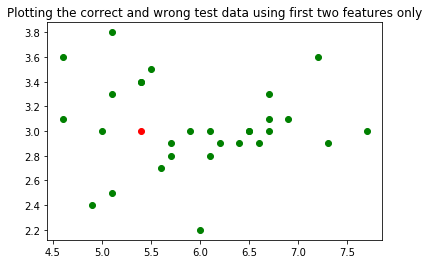

No of errors:
1


In [477]:
count=0
for i in range(0,len(y_predicted)):
    if(y_predicted[i]==y_test[i]):
        plt.plot(x_test[i][0],x_test[i][1],'go')
    else:
        plt.plot(x_test[i][0],x_test[i][1],'ro')
        count=count+1
plt.title("Plotting the correct and wrong test data using first two features only")
plt.show()
print("No of errors:")
print(count)

In [478]:
print(model.coef_)

[[ 0.39277306  1.39238149 -2.1323638  -0.94137184]
 [ 0.50218684 -1.64724991  0.46834276 -1.24174889]
 [-1.65961457 -1.13102386  2.25781721  2.2482524 ]]
